## Project 1
### PGA Tour Golf Stats

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os

In [4]:
# Declare input file paths and file names
pga_data_hist_file = os.path.join("PGA_Data_Historical.csv")
player_exp_file = os.path.join("player_experience_data.csv")


In [5]:
# Load main player and stat data into dataframe
all_pga_data_df = pd.read_csv(pga_data_hist_file)

# Load player experience lookup table
player_exp_df = pd.read_csv(player_exp_file)


In [6]:
# Merge player experience into main dataframe
all_pga_data_df = all_pga_data_df.merge(player_exp_df, how='left', on="Player Name")
all_pga_data_df.head()


,Player Name,Season,Statistic,Variable,Value,Exp-Before-2010,Exp-Less_Eq-2012,Exp-Less_Eq-2015,Exp-Less_Eq-2018
0,Robert Garrigus,2010,Driving Distance,Driving Distance - (ROUNDS),71,4.0,7.0,10.0,13.0
1,Bubba Watson,2010,Driving Distance,Driving Distance - (ROUNDS),77,4.0,7.0,10.0,13.0
2,Dustin Johnson,2010,Driving Distance,Driving Distance - (ROUNDS),83,2.0,5.0,8.0,11.0
3,Brett Wetterich,2010,Driving Distance,Driving Distance - (ROUNDS),54,6.0,9.0,9.0,9.0
4,J.B. Holmes,2010,Driving Distance,Driving Distance - (ROUNDS),100,4.0,7.0,10.0,13.0


In [7]:
# Create a filtered dataframe with only the stats we are interested in

# Define list of stats to keep
keep_variable_stats =  ["Season",
                        "Driving Distance - (ROUNDS)",
                        "Driving Distance - (AVG.)",
                        "Driving Distance - (TOTAL DRIVES)",
                        "Putting Average - (ROUNDS)",
                        "Putting Average - (AVG)",
                        "Total Driving - (EVENTS)",
                        "Total Driving - (TOTAL)",
                        "Total Driving - (DISTANCE RANK)",
                        "Total Driving - (ACCURACY RANK)",
                        "Total Money (Official and Unofficial) - (EVENTS)",
                        "Total Money (Official and Unofficial) - (MONEY)" , 
                        "Proximity to Hole (ARG) - (ROUNDS)",
                        "Proximity to Hole (ARG) - (AVG DTP)",
                        "Proximity to Hole (ARG) - (# OF SHOTS)",
                        "Proximity to Hole (ARG) - (SCRAMBLING RANK)",
                        "Smash Factor - (ROUNDS)",
                        "Smash Factor - (AVG.)",
                        "Smash Factor - (TOTAL SMASH FACTOR)",
                        "Smash Factor - (TOTAL ATTEMPTS)",
                        "Total Putting - (EVENTS)",
                        "Total Putting - (TOTAL)",
                        "Short Game Rating - (EVENTS)",
                        "Short Game Rating - (RATING)"]

# Define count of stats we are keeping for each player
desired_var_stats_cnt = len(keep_variable_stats)

# Create filtered dataframe
temp_filtered_stats = all_pga_data_df.copy()
temp_filtered_stats = temp_filtered_stats.loc[temp_filtered_stats["Variable"].isin(keep_variable_stats),:]

# Drop the Statistic column, and just keep the Variable column
temp_filtered_stats.drop(["Statistic"], axis=1, inplace=True)

# Rename Variable column
temp_filtered_stats.rename(columns={"Variable" : "Statistic"}, inplace=True)

temp_filtered_stats.head()

,Player Name,Season,Statistic,Value,Exp-Before-2010,Exp-Less_Eq-2012,Exp-Less_Eq-2015,Exp-Less_Eq-2018
0,Robert Garrigus,2010,Driving Distance - (ROUNDS),71,4.0,7.0,10.0,13.0
1,Bubba Watson,2010,Driving Distance - (ROUNDS),77,4.0,7.0,10.0,13.0
2,Dustin Johnson,2010,Driving Distance - (ROUNDS),83,2.0,5.0,8.0,11.0
3,Brett Wetterich,2010,Driving Distance - (ROUNDS),54,6.0,9.0,9.0,9.0
4,J.B. Holmes,2010,Driving Distance - (ROUNDS),100,4.0,7.0,10.0,13.0


In [8]:
# Create new dataframe to move our statistics from row values to columns

# Define columns of the new dataframe
desired_columns_lst = ["Player Name",
                       "Season",
                       "Driving Distance - (ROUNDS)",
                       "Driving Distance - (AVG.)", 
                       "Driving Distance - (TOTAL DRIVES)",
                       "Putting Average - (ROUNDS)",
                       "Putting Average - (AVG)",
                       "Total Driving - (EVENTS)",
                       "Total Driving - (TOTAL)",
                       "Total Driving - (DISTANCE RANK)",
                       "Total Driving - (ACCURACY RANK)",
                       "Total Money (Official and Unofficial) - (EVENTS)",
                       "Total Money (Official and Unofficial) - (MONEY)",
                       "Proximity to Hole (ARG) - (ROUNDS)",
                       "Proximity to Hole (ARG) - (AVG DTP)",
                       "Proximity to Hole (ARG) - (# OF SHOTS)",
                       "Proximity to Hole (ARG) - (SCRAMBLING RANK)",
                       "Smash Factor - (ROUNDS)",
                       "Smash Factor - (AVG.)",
                       "Smash Factor - (TOTAL SMASH FACTOR)",
                       "Smash Factor - (TOTAL ATTEMPTS)",
                       "Total Putting - (EVENTS)",
                       "Total Putting - (TOTAL)",
                       "Short Game Rating - (EVENTS)",
                       "Short Game Rating - (RATING)",
                       "Exp-Before-2010",
                       "Exp-Less_Eq-2012",
                       "Exp-Less_Eq-2015",
                       "Exp-Less_Eq-2018"]
                
cln_all_pga_data_df = pd.DataFrame(columns = desired_columns_lst)


for index, rows in temp_filtered_stats.iterrows():  
    # Search if name and season is in the dataframe, if not add
    search = cln_all_pga_data_df.loc[(cln_all_pga_data_df["Player Name"] == rows["Player Name"]) & (cln_all_pga_data_df["Season"] == rows["Season"])]
    if len(search) == 0:
        # Name and season not found.  Insert name, season, and statistic
        data = [{"Player Name" : rows["Player Name"],
                 "Season" : rows["Season"],
                 rows["Statistic"] : rows["Value"],
                 "Exp-Before-2010" : rows["Exp-Before-2010"],
                 "Exp-Less_Eq-2012" : rows["Exp-Less_Eq-2012"],
                 "Exp-Less_Eq-2015" : rows["Exp-Less_Eq-2015"],
                 "Exp-Less_Eq-2018" : rows["Exp-Less_Eq-2018"]}]            
        cln_all_pga_data_df = cln_all_pga_data_df.append(data, ignore_index=True, sort=False)
    else:
        # Name and season found.  Just add the statistic
        cln_all_pga_data_df.loc[(cln_all_pga_data_df["Player Name"] == rows["Player Name"]) & (cln_all_pga_data_df["Season"] == rows["Season"]), rows["Statistic"]] = rows["Value"]    



In [9]:
cln_all_pga_data_df

,Player Name,Season,Driving Distance - (ROUNDS),Driving Distance - (AVG.),Driving Distance - (TOTAL DRIVES),Putting Average - (ROUNDS),Putting Average - (AVG),Total Driving - (EVENTS),Total Driving - (TOTAL),Total Driving - (DISTANCE RANK),...,Smash Factor - (TOTAL SMASH FACTOR),Smash Factor - (TOTAL ATTEMPTS),Total Putting - (EVENTS),Total Putting - (TOTAL),Short Game Rating - (EVENTS),Short Game Rating - (RATING),Exp-Before-2010,Exp-Less_Eq-2012,Exp-Less_Eq-2015,Exp-Less_Eq-2018
0,Robert Garrigus,2010,71,315.5,130,71,1.786,22,176,1,...,64.900,44,22,245.2,12,5.5,4.0,7.0,10.0,13.0
1,Bubba Watson,2010,77,309.8,154,77,1.763,22,178,2,...,101.947,69,22,219.9,13,5.6,4.0,7.0,10.0,13.0
2,Dustin Johnson,2010,83,308.5,164,83,1.767,23,175,3,...,96.131,65,23,239.6,13,5.8,2.0,5.0,8.0,11.0
3,Brett Wetterich,2010,54,307.3,108,54,1.801,16,166,4,...,57.606,39,16,200.0,11,6.0,6.0,9.0,9.0,9.0
4,J.B. Holmes,2010,100,307.2,200,100,1.770,26,188,5,...,106.525,72,26,234.8,21,6.2,4.0,7.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3720,Collin Morikawa,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,6.8,0.0,0.0,0.0,1.0
3721,Braden Thornberry,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,5.9,0.0,0.0,0.0,2.0
3722,Matt Parziale,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,5.3,0.0,0.0,0.0,1.0
3723,Will Grimmer,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,4.8,0.0,0.0,0.0,1.0


In [10]:
# Drop rows with NaN values
cln_all_pga_data_df.dropna(axis=0, how='any', inplace=True)

# Convert stat columns to appropriate datatypes

# Define a conversion dictionary
conversion_dict = {"Season" : "int64",
                   "Driving Distance - (ROUNDS)" : "int64",
                   "Driving Distance - (AVG.)" : "float64",
                   "Driving Distance - (TOTAL DRIVES)" : "int64",
                   "Putting Average - (ROUNDS)" : "int64",
                   "Putting Average - (AVG)" : "float64",
                    "Total Driving - (EVENTS)" : "int64",
                    "Total Driving - (TOTAL)" : "int64",
                    "Total Driving - (DISTANCE RANK)" : "int64",
                    "Total Driving - (ACCURACY RANK)" : "int64",
# NEEDS CONVERSION  "Total Money (Official and Unofficial) - (EVENTS)"
# NEEDS CONVERSION  "Total Money (Official and Unofficial) - (MONEY)"  
# NEEDS CONVERSION  "Proximity to Hole (ARG) - (ROUNDS)"
# NEEDS CONVERSION  "Proximity to Hole (ARG) - (AVG DTP)"
                    "Proximity to Hole (ARG) - (# OF SHOTS)"  : "int64",
                    "Proximity to Hole (ARG) - (SCRAMBLING RANK)" : "int64",
                    "Smash Factor - (ROUNDS)" : "int64",
                    "Smash Factor - (AVG.)" : "float64",
                    "Smash Factor - (TOTAL SMASH FACTOR)" : "float64",
                    "Smash Factor - (TOTAL ATTEMPTS)" : "int64",
                    "Total Putting - (EVENTS)" : "int64",
                    "Total Putting - (TOTAL)" : "float64",
                    "Short Game Rating - (EVENTS)" : "int64",
                    "Short Game Rating - (RATING)" : "float64"
                  }

# Convert column datatypes, ignore errors and keep any NaNs if they exist
cln_all_pga_data_df = cln_all_pga_data_df.astype(conversion_dict, errors="ignore")

cln_all_pga_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1661 entries, 0 to 3488
Data columns (total 29 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Player Name                                       1661 non-null   object 
 1   Season                                            1661 non-null   int64  
 2   Driving Distance - (ROUNDS)                       1661 non-null   int64  
 3   Driving Distance - (AVG.)                         1661 non-null   float64
 4   Driving Distance - (TOTAL DRIVES)                 1661 non-null   int64  
 5   Putting Average - (ROUNDS)                        1661 non-null   int64  
 6   Putting Average - (AVG)                           1661 non-null   float64
 7   Total Driving - (EVENTS)                          1661 non-null   int64  
 8   Total Driving - (TOTAL)                           1661 non-null   int64  
 9   Total Driving - (DI

In [11]:
#cln_all_pga_data_df.to_csv("output_data/cln_all_pga_data_df.csv", index=False)

In [12]:
# If we need these, this is how to split our dataframe into groups

# Create dataframes for groups of 3 years
cln_2010_2012_df = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"].isin(["2010", "2011", "2012"]),:]
cln_2010_2012_df.reset_index(inplace=True)

cln_2010_df = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"].isin(["2010"]),:]
cln_2010_df.reset_index(inplace=True)

cln_2013_2015_df = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"].isin(["2013", "2014", "2015"]),:]
cln_2013_2015_df.reset_index(inplace=True)

cln_2016_2018_df = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"].isin(["2016", "2017", "2018"]),:]
cln_2016_2018_df.reset_index(inplace=True)

# Create dataframes for groups of 4 years
cln_2011_2014_df = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"].isin(["2011", "2012", "2013", "2014"]),:]
cln_2011_2014_df.reset_index(inplace=True)

cln_2015_2018_df = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"].isin(["2015", "2016", "2017", "2018"]),:]
cln_2015_2018_df.reset_index(inplace=True)

cln_2010_df = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"].isin(["2010"]),:]
cln_2010_df.reset_index(inplace=True)
cln_2011_df = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"].isin(["2011"]),:]
cln_2011_df.reset_index(inplace=True)
cln_2012_df = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"].isin(["2012"]),:]
cln_2012_df.reset_index(inplace=True)
cln_2013_df = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"].isin(["2013"]),:]
cln_2013_df.reset_index(inplace=True)
cln_2014_df = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"].isin(["2014"]),:]
cln_2014_df.reset_index(inplace=True)
cln_2015_df = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"].isin(["2015"]),:]
cln_2015_df.reset_index(inplace=True)
cln_2016_df = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"].isin(["2016"]),:]
cln_2016_df.reset_index(inplace=True)
cln_2017_df = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"].isin(["2017"]),:]
cln_2017_df.reset_index(inplace=True)
cln_2018_df = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"].isin(["2018"]),:]
cln_2018_df.reset_index(inplace=True)

In [13]:
cln_2017_df.tail()


,index,Player Name,Season,Driving Distance - (ROUNDS),Driving Distance - (AVG.),Driving Distance - (TOTAL DRIVES),Putting Average - (ROUNDS),Putting Average - (AVG),Total Driving - (EVENTS),Total Driving - (TOTAL),...,Smash Factor - (TOTAL SMASH FACTOR),Smash Factor - (TOTAL ATTEMPTS),Total Putting - (EVENTS),Total Putting - (TOTAL),Short Game Rating - (EVENTS),Short Game Rating - (RATING),Exp-Before-2010,Exp-Less_Eq-2012,Exp-Less_Eq-2015,Exp-Less_Eq-2018
180,3068,Jason Bohn,2017,75,275.9,142,75,1.814,28,237,...,88.075,59,28,217.2,7,6.1,6.0,9.0,12.0,15.0
181,3069,Ken Duke,2017,77,274.2,142,77,1.791,26,198,...,67.222,45,26,294.3,10,6.4,7.0,9.0,12.0,15.0
182,3071,Zac Blair,2017,105,272.7,190,105,1.778,32,196,...,113.019,76,32,172.9,14,6.7,0.0,0.0,2.0,5.0
183,3072,Brian Stuard,2017,93,272.3,162,93,1.767,31,192,...,96.090,64,31,222.4,8,7.3,0.0,1.0,4.0,7.0
184,3073,Jim Furyk,2017,54,270.1,94,54,1.802,18,194,...,54.268,37,18,135.6,6,6.4,16.0,19.0,22.0,25.0


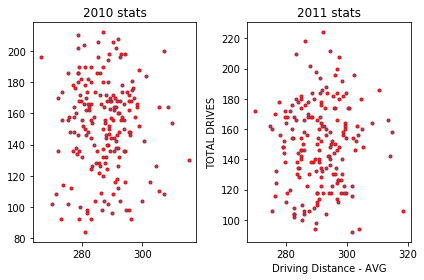

In [69]:
fig1, (pl0t1, pl0t2) = plt.subplots(1, 2)
# fig.suptitle("something random", fontsize=16, fontweight="bold")


pl0t1.scatter(cln_2010_df.iloc[:,4], cln_2010_df.iloc[:,5], marker=".", edgecolors="red")
pl0t1.set_title("2010 stats")

pl0t2.scatter(cln_2011_df.iloc[:,4], cln_2011_df.iloc[:,5], marker=".", edgecolors="red")
pl0t2.set_title("2011 stats")

pl0t3.scatter(cln_2012_df.iloc[:,4], cln_2012_df.iloc[:,5], marker=".", edgecolors="red")
pl0t3.set_title("2012 stats")

pl0t4.scatter(cln_2013_df.iloc[:,4], cln_2013_df.iloc[:,5], marker=".", edgecolors="red")
pl0t4.set_title("2014 stats")
plt.xlabel("Driving Distance - AVG")
plt.ylabel("TOTAL DRIVES")

plt.tight_layout()

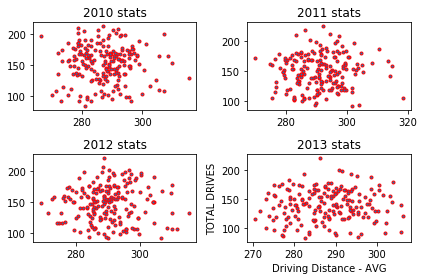

In [74]:

fig1, ((pl0t1, pl0t2), (pl0t3,pl0t4)) = plt.subplots(2, 2)
# fig.suptitle("something random", fontsize=16, fontweight="bold")


pl0t1.scatter(cln_2010_df.iloc[:,4], cln_2010_df.iloc[:,5], marker=".", edgecolors="red")
# pl0t1.plot(cln_2010_df.iloc[:,4], cln_2010_df.iloc[:,5], "b--", linewidth=1)
pl0t1.set_title("2010 stats")

pl0t2.scatter(cln_2011_df.iloc[:,4], cln_2011_df.iloc[:,5], marker=".", edgecolors="red")
pl0t2.set_title("2011 stats")

pl0t3.scatter(cln_2012_df.iloc[:,4], cln_2012_df.iloc[:,5], marker=".", edgecolors="red")
pl0t3.set_title("2012 stats")

pl0t4.scatter(cln_2013_df.iloc[:,4], cln_2013_df.iloc[:,5], marker=".", edgecolors="red")
pl0t4.set_title("2013 stats")
plt.xlabel("Driving Distance - AVG")
plt.ylabel("TOTAL DRIVES")

plt.tight_layout()

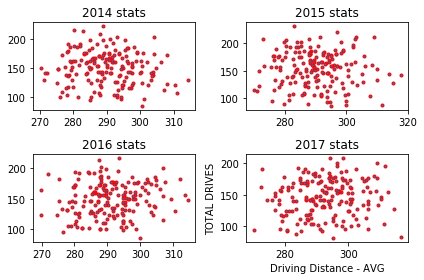

In [62]:
fig2, ((pl00t1, pl00t2), (pl00t3,pl00t4)) = plt.subplots(2, 2)
# fig.suptitle("something random", fontsize=16, fontweight="bold")


pl00t1.scatter(cln_2014_df.iloc[:,4], cln_2014_df.iloc[:,5], marker=".", edgecolors="red")
pl00t1.set_title("2014 stats")

pl00t2.scatter(cln_2015_df.iloc[:,4], cln_2015_df.iloc[:,5], marker=".", edgecolors="red")
pl00t2.set_title("2015 stats")

pl00t3.scatter(cln_2016_df.iloc[:,4], cln_2016_df.iloc[:,5], marker=".", edgecolors="red")
pl00t3.set_title("2016 stats")

pl00t4.scatter(cln_2017_df.iloc[:,4], cln_2017_df.iloc[:,5], marker=".", edgecolors="red")
pl00t4.set_title("2017 stats")
plt.xlabel("Driving Distance - AVG")
plt.ylabel("TOTAL DRIVES")

plt.tight_layout()

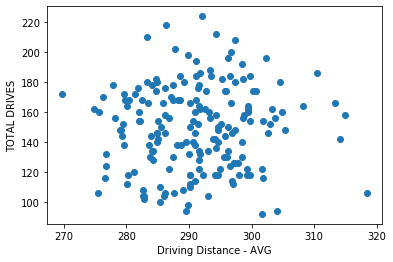

In [16]:
plt.scatter(cln_2011_df.iloc[:,4], cln_201_df.iloc[:,5])
plt.xlabel("Driving Distance - AVG")
plt.ylabel("TOTAL DRIVES")
plt.show()

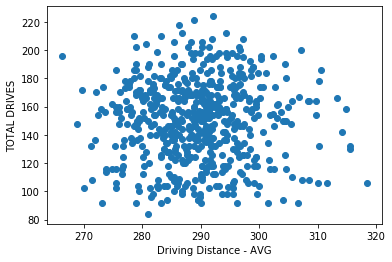

In [17]:
plt.scatter(cln_2010_2012_df.iloc[:,4], cln_2010_2012_df.iloc[:,5])
plt.xlabel("Driving Distance - AVG")
plt.ylabel("TOTAL DRIVES")
plt.show()

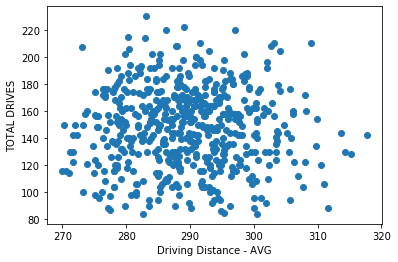

In [18]:
plt.scatter(cln_2013_2015_df.iloc[:,4], cln_2013_2015_df.iloc[:,5])
plt.xlabel("Driving Distance - AVG")
plt.ylabel("TOTAL DRIVES")
plt.show()

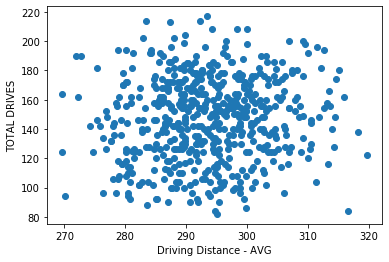

In [19]:
plt.scatter(cln_2016_2018_df.iloc[:,4], cln_2016_2018_df.iloc[:,5])
plt.xlabel("Driving Distance - AVG")
plt.ylabel("TOTAL DRIVES")
plt.show()

In [70]:
# drive_dist_avg_year = cln_all_pga_data_df.iloc[:,4]
# first = cln_2010_2012_df.iloc[:,5]
# second = cln_2013_2015_df.iloc[:,5]
# third = cln_2016_2018_df.iloc[:,5]

# fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
# fig.suptitle("Driving Distance Average", fontsize=16, fontweight="bold")

# ax1.set_xlim(min(drive_dist_avg_year), max(drive_dist_avg_year))
# ax1.plot(first, drive_dist_avg_year, linewidth=1, marker="o", color="r")
# ax1.set_xlabel("2010-2012")

# ax2.plot(second, drive_dist_avg_year, linewidth=1, marker="o", color="b")
# ax2.set_xlabel("2013-2015")

# ax3.plot(third, drive_dist_avg_year, linewidth=1, marker="o", color="g")
# ax3.set_xlabel("2016-2018")
# ax3.set_xlabel("Year")

# plt.show()

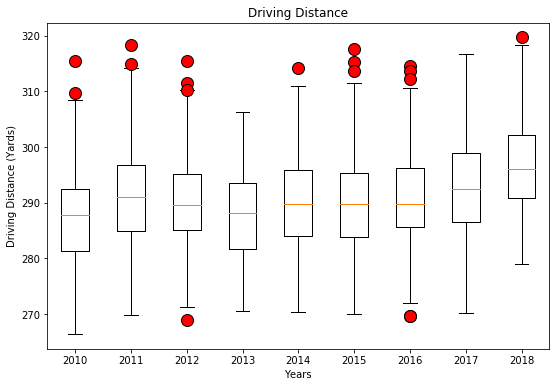

In [71]:
# DRIVING PEFORMANCE
# Boxplot of driving data across years

# Driving Distance - (AVG.)
driv_dist_2010 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2010,"Driving Distance - (AVG.)"]
driv_dist_2011 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2011,"Driving Distance - (AVG.)"]
driv_dist_2012 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2012,"Driving Distance - (AVG.)"]
driv_dist_2013 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2013,"Driving Distance - (AVG.)"]
driv_dist_2014 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2014,"Driving Distance - (AVG.)"]
driv_dist_2015 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2015,"Driving Distance - (AVG.)"]
driv_dist_2016 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2016,"Driving Distance - (AVG.)"]
driv_dist_2017 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2017,"Driving Distance - (AVG.)"]
driv_dist_2018 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2018,"Driving Distance - (AVG.)"]

driv_data_boxplot_to_plot = [driv_dist_2010, driv_dist_2011, driv_dist_2012, \
                             driv_dist_2013, driv_dist_2014, driv_dist_2015, \
                             driv_dist_2016, driv_dist_2017, driv_dist_2018]

# Create figure and axes
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
boxplot = ax.boxplot(driv_data_boxplot_to_plot, flierprops=dict(markerfacecolor='r', marker='o', markersize=12.0))
ax.set_xticklabels([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
ax.set(title = "Driving Distance",
       xlabel = "Years",
       ylabel = "Driving Distance (Yards)")
plt.show()

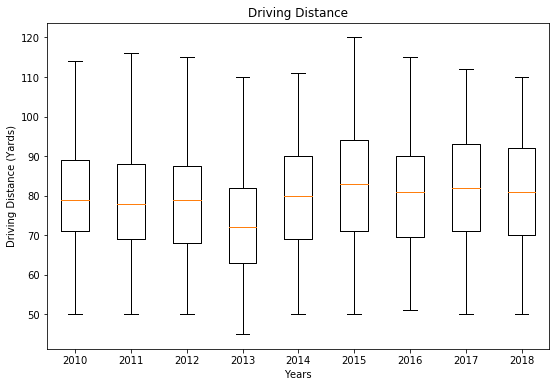

In [76]:
# DRIVING PEFORMANCE
# Boxplot of driving data across years

# Driving Distance - (ROUNDS)
driv_dist_2010r = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2010,"Driving Distance - (ROUNDS)"]
driv_dist_2011r = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2011,"Driving Distance - (ROUNDS)"]
driv_dist_2012r = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2012,"Driving Distance - (ROUNDS)"]
driv_dist_2013r = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2013,"Driving Distance - (ROUNDS)"]
driv_dist_2014r = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2014,"Driving Distance - (ROUNDS)"]
driv_dist_2015r = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2015,"Driving Distance - (ROUNDS)"]
driv_dist_2016r = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2016,"Driving Distance - (ROUNDS)"]
driv_dist_2017r = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2017,"Driving Distance - (ROUNDS)"]
driv_dist_2018r = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2018,"Driving Distance - (ROUNDS)"]

driv_data_boxplot_to_plotr = [driv_dist_2010r, driv_dist_2011r, driv_dist_2012r, \
                             driv_dist_2013r, driv_dist_2014r, driv_dist_2015r, \
                             driv_dist_2016r, driv_dist_2017r, driv_dist_2018r]

# Create figure and axes
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
boxplot = ax.boxplot(driv_data_boxplot_to_plotr, flierprops=dict(markerfacecolor='r', marker='o', markersize=12.0))
ax.set_xticklabels([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
ax.set(title = "Driving Distance",
       xlabel = "Years",
       ylabel = "Driving Distance (Yards)")
plt.show()

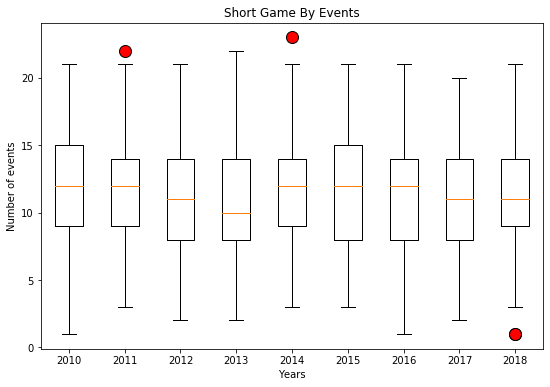

In [75]:
# Short Game Rating - (EVENTS)
short_game_event_2010 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2010,"Short Game Rating - (EVENTS)"]
short_game_event_2011 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2011,"Short Game Rating - (EVENTS)"]
short_game_event_2012 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2012,"Short Game Rating - (EVENTS)"]
short_game_event_2013 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2013,"Short Game Rating - (EVENTS)"]
short_game_event_2014 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2014,"Short Game Rating - (EVENTS)"]
short_game_event_2015 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2015,"Short Game Rating - (EVENTS)"]
short_game_event_2016 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2016,"Short Game Rating - (EVENTS)"]
short_game_event_2017 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2017,"Short Game Rating - (EVENTS)"]
short_game_event_2018 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2018,"Short Game Rating - (EVENTS)"]
short_game_event_boxplot = [short_game_event_2010, short_game_event_2011, short_game_event_2012, \
                            short_game_event_2013, short_game_event_2014, short_game_event_2015, \
                            short_game_event_2016, short_game_event_2017, short_game_event_2018]
# driv_data_boxplot_to_plot = [driv_dist_2010, driv_dist_2011, driv_dist_2012, \
#                              driv_dist_2013, driv_dist_2014, driv_dist_2015, \
#                              driv_dist_2016, driv_dist_2017, driv_dist_2018]
# Create figure and axes
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)
# Create the boxplot
boxplot = ax.boxplot(short_game_event_boxplot, flierprops=dict(markerfacecolor='r', marker='o', markersize=12.0))
ax.set_xticklabels([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
ax.set(title = "Short Game By Events",
       xlabel = "Years",
       ylabel = "Number of events")
plt.show()

In [ ]:
alpha = 1e-3
print("The null hypothesis is that this sample comes from a normal distribution")

print("For 2010 Driving Distance:")
k2, p = st.normaltest(driv_dist_2010)
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("--------------------------\n")
print("For 2011 Driving Distance:")
k2, p = st.normaltest(driv_dist_2011)
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("--------------------------\n")
print("For 2012 Driving Distance:")
k2, p = st.normaltest(driv_dist_2012)
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("--------------------------\n")
print("For 2013 Driving Distance:")
k2, p = st.normaltest(driv_dist_2013)
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("--------------------------\n")
print("For 2014 Driving Distance:")
k2, p = st.normaltest(driv_dist_2014)
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("--------------------------\n")
print("For 2015 Driving Distance:")
k2, p = st.normaltest(driv_dist_2015)
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("--------------------------\n")
print("For 2016 Driving Distance:")
k2, p = st.normaltest(driv_dist_2016)
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("--------------------------\n")
print("For 2017 Driving Distance:")
k2, p = st.normaltest(driv_dist_2017)
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("--------------------------\n")
print("For 2018 Driving Distance:")
k2, p = st.normaltest(driv_dist_2018)
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("--------------------------\n")






In [ ]:
21